<a href="https://colab.research.google.com/github/samridhibisht/CodSoft/blob/main/CREDIT_CARD_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
train=pd.read_csv('fraudTrain.csv')

In [ ]:
train.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
import seaborn as sns

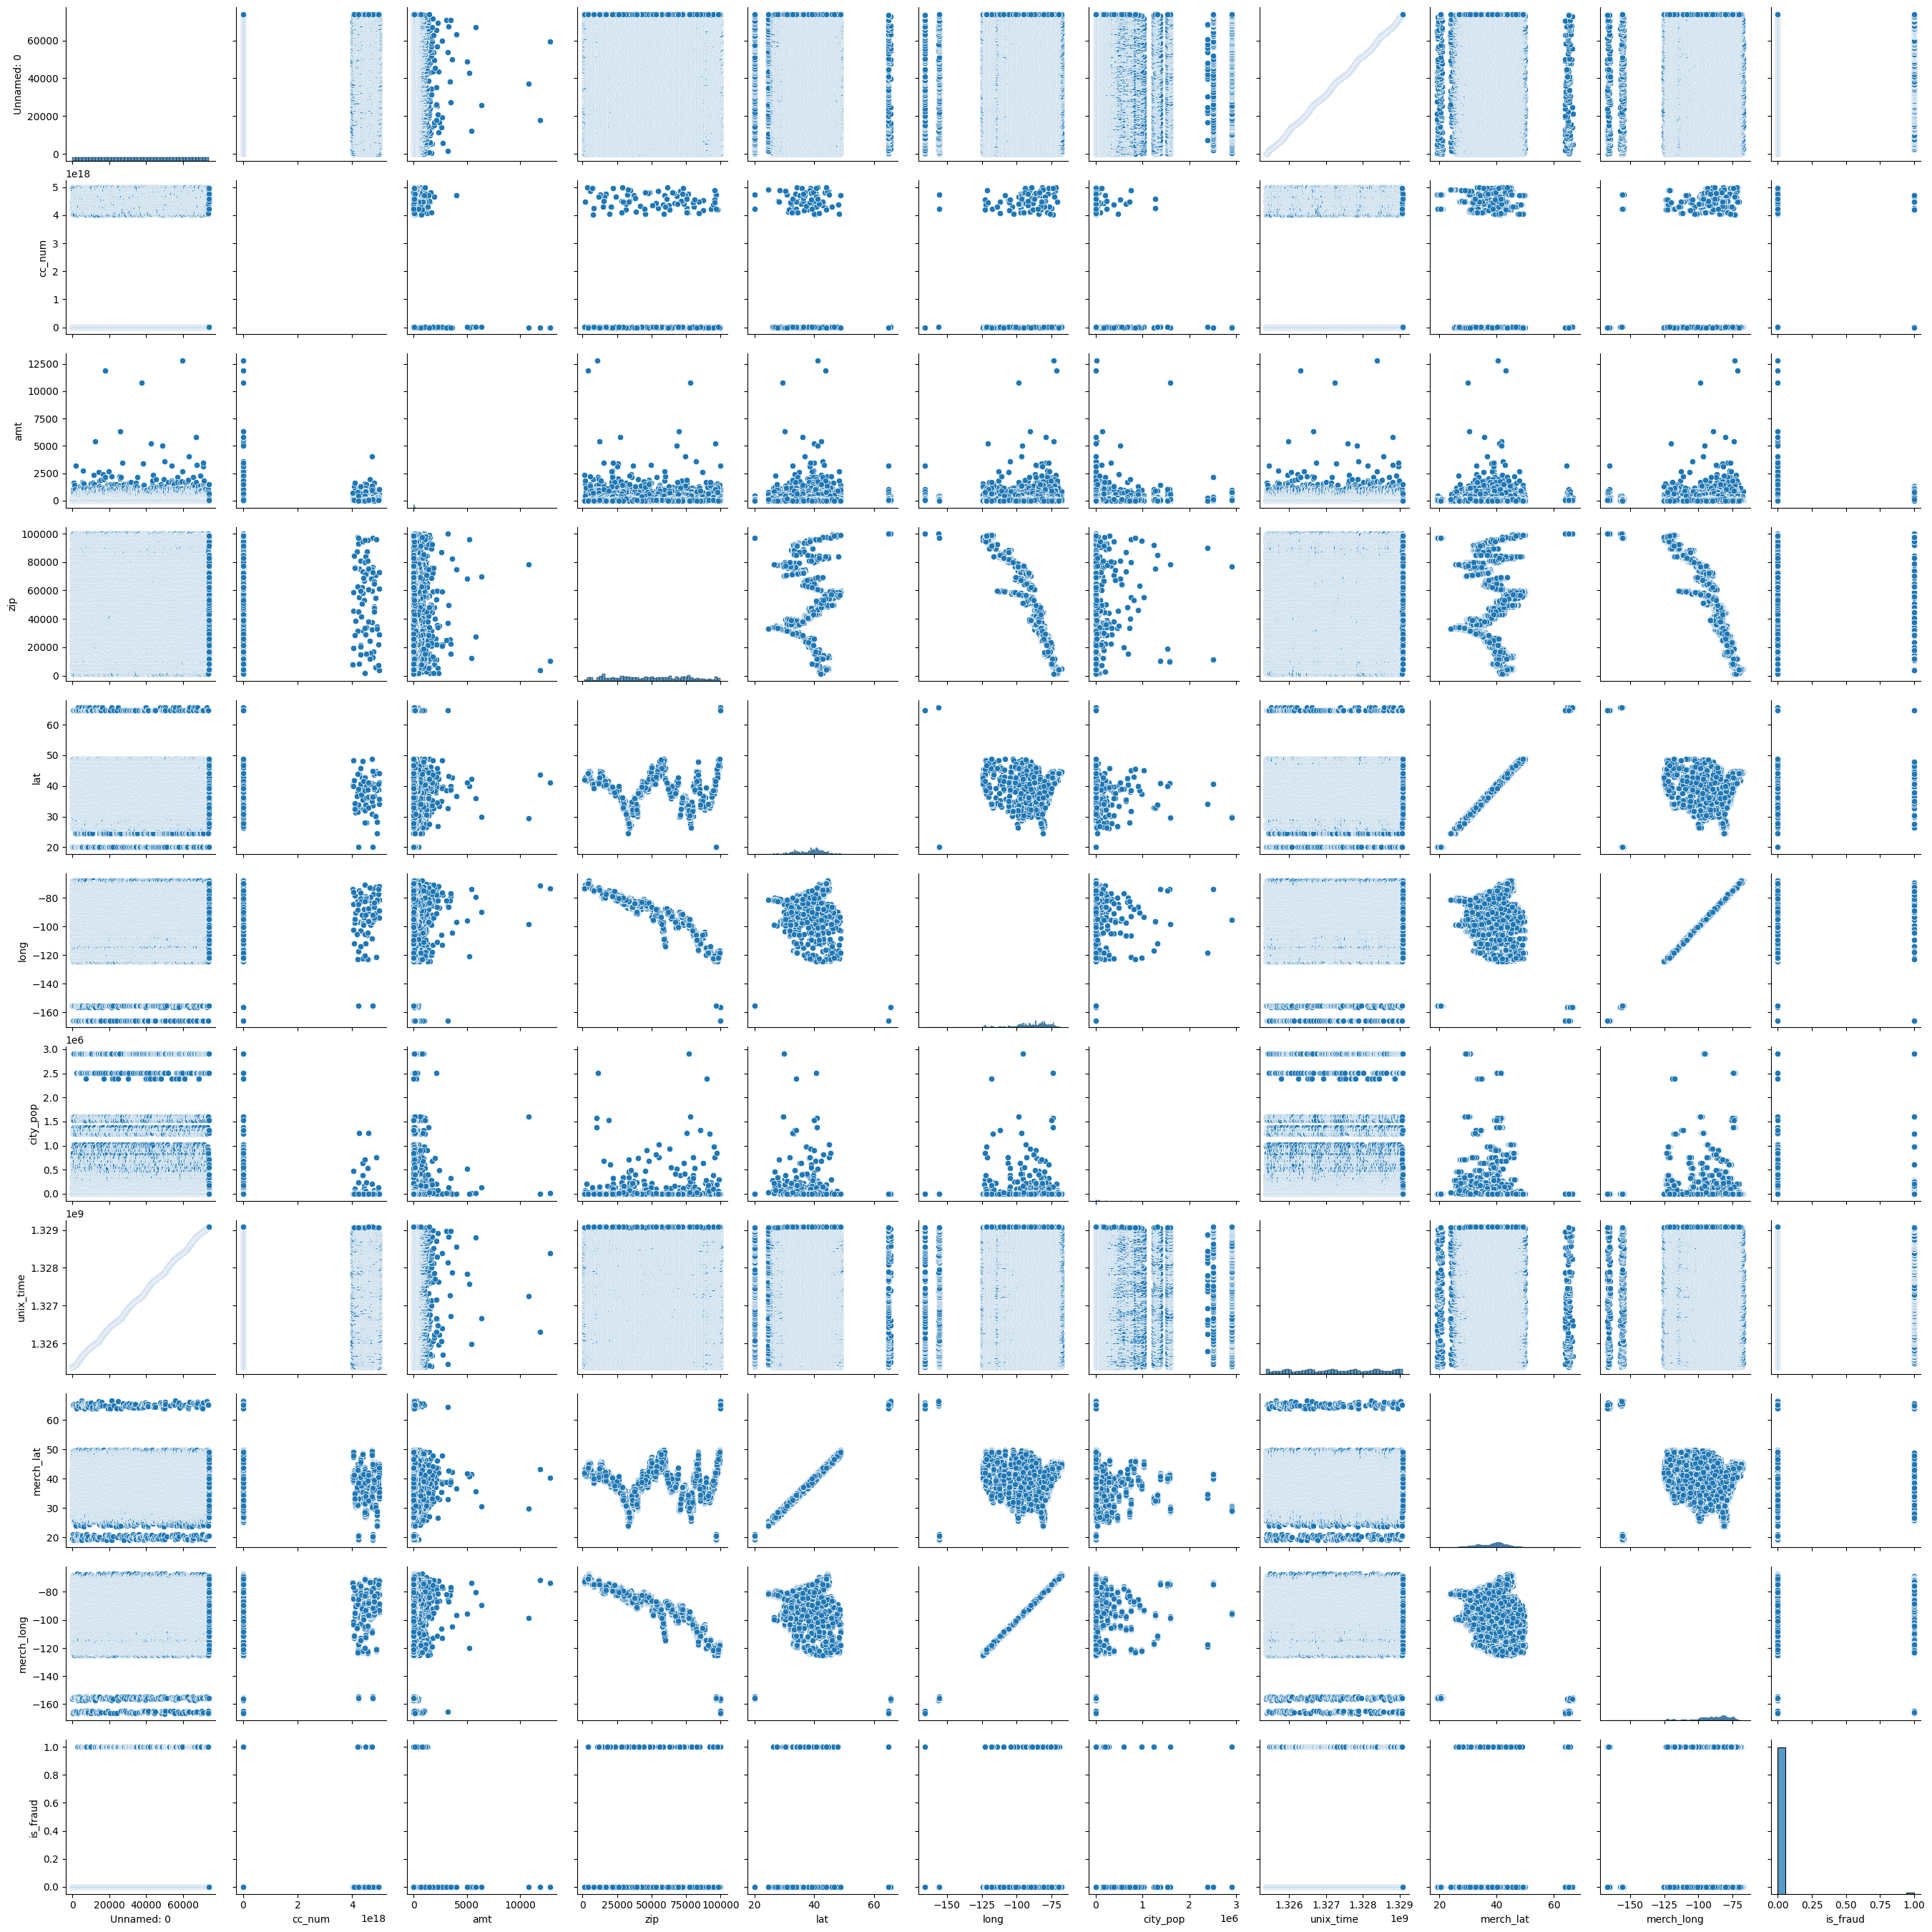

In [ ]:
sns.pairplot(train)

In [ ]:
train.corr()

<ipython-input-17-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000381,0.002696,0.002332,0.001328,0.001603,0.003902,0.999742,0.001068,0.001701,0.005680
cc_num,-0.000381,1.000000,-0.004247,0.043942,-0.057397,-0.051887,-0.009002,-0.000258,-0.057387,-0.052048,-0.010240
amt,0.002696,-0.004247,1.000000,-0.006181,0.009808,0.004735,0.011222,0.002617,0.009561,0.004885,0.292664
zip,0.002332,0.043942,-0.006181,1.000000,-0.112732,-0.908007,0.083769,0.002145,-0.111686,-0.907312,-0.009691
lat,0.001328,-0.057397,0.009808,-0.112732,1.000000,-0.019621,-0.163616,0.001407,0.993582,-0.019589,0.014020
long,0.001603,-0.051887,0.004735,-0.908007,-0.019621,1.000000,-0.055911,0.001743,-0.019840,0.999125,0.001865
city_pop,0.003902,-0.009002,0.011222,0.083769,-0.163616,-0.055911,1.000000,0.003875,-0.162147,-0.055951,0.007980
unix_time,0.999742,-0.000258,0.002617,0.002145,0.001407,0.001743,0.003875,1.000000,0.001147,0.001837,0.005443
merch_lat,0.001068,-0.057387,0.009561,-0.111686,0.993582,-0.019840,-0.162147,0.001147,1.000000,-0.019829,0.013896
merch_long,0.001701,-0.052048,0.004885,-0.907312,-0.019589,0.999125,-0.055951,0.001837,-0.019829,1.000000,0.001817


In [ ]:
X=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']]

In [ ]:
y=train['is_fraud']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train,y_train)

SVC()

In [ ]:
pred=sv.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7323
         1.0       0.00      0.00      0.00        70

    accuracy                           0.99      7393
   macro avg       0.50      0.50      0.50      7393
weighted avg       0.98      0.99      0.99      7393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test=pd.read_csv('fraudTest.csv')

In [ ]:
test.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
Xt=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']]

In [ ]:
yt=train['is_fraud']

In [ ]:
Xt_train,Xt_test,yt_train,yt_test=train_test_split(Xt,yt,test_size=0.9,random_state=101)

In [ ]:
Xt_train = Xt_train.dropna()
yt_train = yt_train[Xt_train.index]

In [ ]:
sv=SVC()

In [ ]:
sv.fit(Xt_train,yt_train)

SVC()

In [ ]:
predt=sv.predict(Xt_test.dropna())

In [ ]:
print(classification_report(yt_test.dropna(),predt))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     65896
         1.0       0.00      0.00      0.00       635

    accuracy                           0.99     66531
   macro avg       0.50      0.50      0.50     66531
weighted avg       0.98      0.99      0.99     66531



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
